# Global Disaster Analysis
**Student Name:** Alperen Sağlam - 150240715

**Student Name:** İbrahim Bancar - 150220313




### 1. Introduction
This notebook performs a comprehensive **Exploratory Data Analysis (EDA)** on the Global Disaster Dataset. The goal is to understand the underlying structure of the data, identify key patterns, clean inconsistencies, and visualize high-impact trends.

**Objectives:**
- Understand the structure and content of the dataset
- Analyze distributions of key impact and response variables
- Explore temporal and geographical patterns
- Identify correlations and potential outliers

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import geopandas as gpd
import geodatasets
from utils import *

In [17]:
# Load dataset
file_path = "../data/public_emdat_custom_request_2018-2024.xlsx"
df = pd.read_excel(file_path)

print(f"Data Shape: {df.shape}")
df.head(3)


Data Shape: (4014, 47)


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,GADM Admin Units,Entry Date,Last Update
0,2018-0040-BRA,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),DFO:4576,NaN,BRA,...,NaN,NaN,NaN,10000.0,12492.0,80.049596,"[{""adm2_code"":9961,""adm2_name"":""Rio De Janeiro""}]","[{""gid_2"":""BRA.19.68_2"",""migration_date"":""2025...",2018-02-20,2025-12-20
1,2022-0770-RWA,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,RWA,...,NaN,NaN,NaN,NaN,NaN,93.294607,"[{""adm1_code"":21970,""adm1_name"":""Kigali City/U...","[{""gid_1"":""RWA.5_1"",""migration_date"":""2025-12-...",2022-11-25,2025-12-20
2,2024-9796-USA,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,USA,...,NaN,NaN,NaN,5400000.0,5400000.0,100.000000,NaN,"[{""gid_1"":""USA.13_1"",""name_1"":""Idaho""},{""gid_1...",2024-10-29,2025-12-20


In [18]:
# General info
print("--- Info ---")
print(df.info()) 

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     4014 non-null   object 
 1   Historic                                   4014 non-null   object 
 2   Classification Key                         4014 non-null   object 
 3   Disaster Group                             4014 non-null   object 
 4   Disaster Subgroup                          4014 non-null   object 
 5   Disaster Type                              4014 non-null   object 
 6   Disaster Subtype                           4014 non-null   object 
 7   External IDs                               1156 non-null   object 
 8   Event Name                                 1252 non-null   object 
 9   ISO                                        4014 non-null   object 
 10  Country    

In [19]:
# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
DisNo.                                          0
Historic                                        0
Classification Key                              0
Disaster Group                                  0
Disaster Subgroup                               0
Disaster Type                                   0
Disaster Subtype                                0
External IDs                                 2858
Event Name                                   2762
ISO                                             0
Country                                         0
Subregion                                       0
Region                                          0
Location                                      434
Origin                                       2759
Associated Types                             2829
OFDA/BHA Response                               0
Appeal                                          0
Declaration                                     0
AID Contribution ('000 US$

In [20]:
# Statistical summary
print("\n--- Statistics ---")
print(df.describe().T)


--- Statistics ---
                                            count          mean           std  \
AID Contribution ('000 US$)                   1.0  1.000000e+04           NaN   
Magnitude                                   624.0  2.243767e+04  7.800276e+04   
Latitude                                    256.0  1.642828e+01  2.167095e+01   
Longitude                                   256.0  4.644094e+01  7.174308e+01   
Start Year                                 4014.0  2.021098e+03  1.985503e+00   
Start Month                                3983.0  6.342204e+00  3.394406e+00   
Start Day                                  3696.0  1.514259e+01  9.087812e+00   
End Year                                   4014.0  2.021130e+03  1.989514e+00   
End Month                                  4005.0  6.634956e+00  3.406314e+00   
End Day                                    3737.0  1.600937e+01  9.029820e+00   
Total Deaths                               3118.0  1.289089e+02  1.209891e+03   
No. Inju

In [21]:
# Value counts
if "Disaster Type" in df.columns:
    print("\n--- Disaster Types ---")
    print(df["Disaster Type"].value_counts())


--- Disaster Types ---
Disaster Type
Flood                               1227
Storm                                839
Road                                 356
Water                                272
Extreme temperature                  191
Earthquake                           172
Mass movement (wet)                  141
Epidemic                             121
Fire (Miscellaneous)                 117
Drought                              109
Wildfire                             105
Air                                   57
Explosion (Industrial)                49
Volcanic activity                     41
Collapse (Industrial)                 40
Miscellaneous accident (General)      36
Collapse (Miscellaneous)              31
Rail                                  31
Explosion (Miscellaneous)             24
Fire (Industrial)                     18
Industrial accident (General)         11
Infestation                           10
Gas leak                               8
Glacial lake outbur

In [22]:
# Ensure numeric
for c in ["Start Year", "Start Month", "Start Day", "End Year", "End Month", "End Day"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Fill missing month/day to create a valid date:
# - If month missing -> set to 1 (January)
# - If day missing -> set to 1
df["start_month_f"] = df["Start Month"].fillna(1).astype(int)
df["start_day_f"]   = df["Start Day"].fillna(1).astype(int)

df["event_start_date"] = pd.to_datetime(
    dict(year=df["Start Year"].astype(int), month=df["start_month_f"], day=df["start_day_f"]),
    errors="coerce"
)

# Useful temporal features
df["year"] = df["event_start_date"].dt.year
df["month"] = df["event_start_date"].dt.month

print("Start date range:",
      df["event_start_date"].min().date(),
      "to",
      df["event_start_date"].max().date())

df[["event_start_date", "year", "month", "Start Year", "Start Month", "Start Day"]].head()


Start date range: 2018-01-01 to 2024-12-31


,event_start_date,year,month,Start Year,Start Month,Start Day
0,2018-02-14,2018,2,2018,2.0,14.0
1,2022-11-17,2022,11,2022,11.0,17.0
2,2024-01-01,2024,1,2024,1.0,NaN
3,2022-08-31,2022,8,2022,8.0,31.0
4,2022-09-08,2022,9,2022,9.0,8.0


In [23]:
print("Number of unique disaster types:")
print(df["Disaster Type"].nunique())

print("\nTop 10 most frequent disaster types:")
print(df["Disaster Type"].value_counts().head(5))


Number of unique disaster types:
26

Top 10 most frequent disaster types:
Disaster Type
Flood                  1227
Storm                   839
Road                    356
Water                   272
Extreme temperature     191
Name: count, dtype: int64


In [24]:
print("\nNumber of unique countries:")
print(df["Country"].nunique())

print("\nTop 10 most affected countries by event count:")
print(df["Country"].value_counts().head(10))



Number of unique countries:
195

Top 10 most affected countries by event count:
Country
United States of America            201
India                               175
Indonesia                           173
China                               170
Philippines                         111
Pakistan                             90
Brazil                               88
Democratic Republic of the Congo     88
Nigeria                              78
Mexico                               72
Name: count, dtype: int64


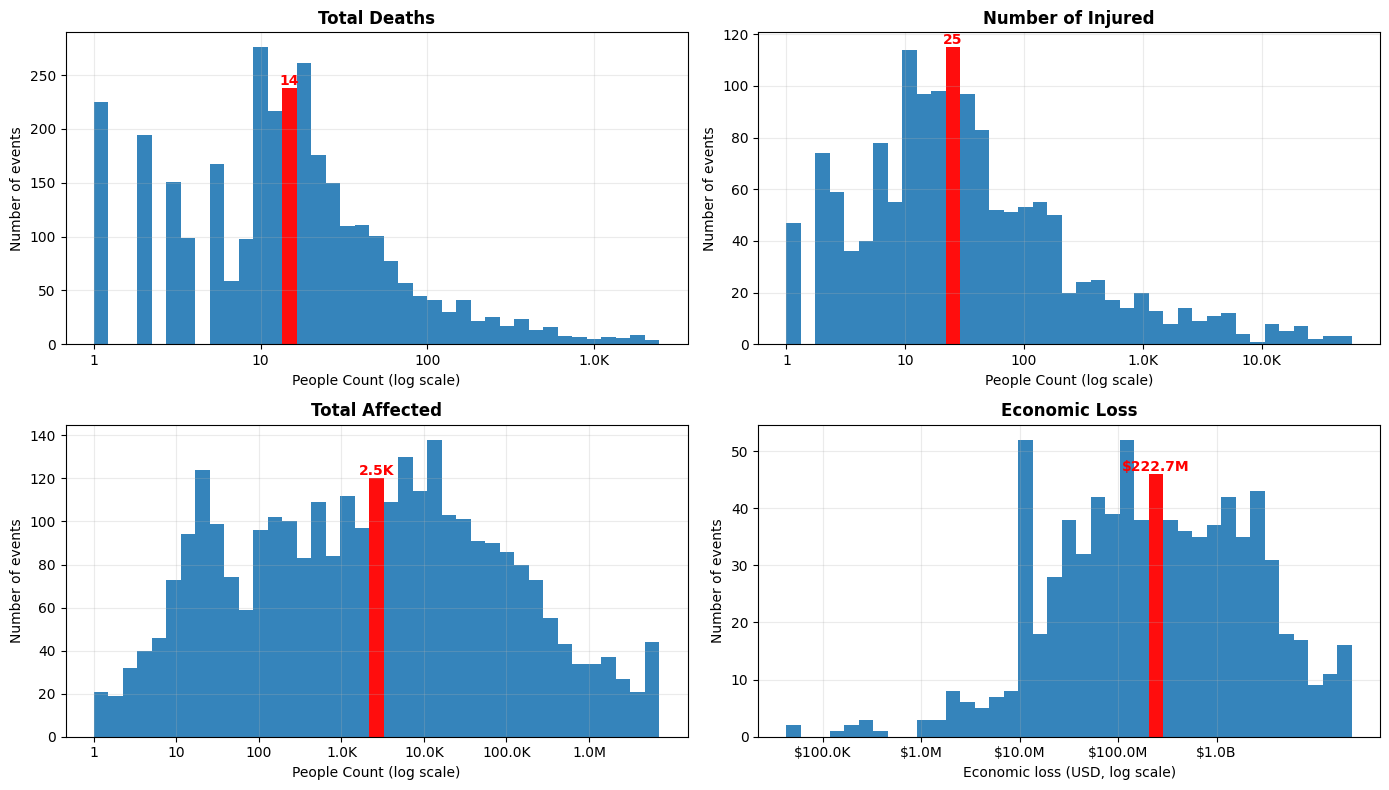

In [25]:
# =========================
# FIGURE
# =========================

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

ticks_people = [1, 10, 100, 1_000, 10_000, 100_000, 1_000_000]
ticks_usd    = [1_000, 10_000, 100_000, 1_000_000, 10_000_000, 100_000_000, 1_000_000_000]

plot_hist_log_highlight_median(
    axes[0],
    df["Total Deaths"],
    "Total Deaths",
    "People Count (log scale)",
    ticks_people
)

plot_hist_log_highlight_median(
    axes[1],
    df["No. Injured"],
    "Number of Injured",
    "People Count (log scale)",
    ticks_people
)

plot_hist_log_highlight_median(
    axes[2],
    df["Total Affected"],
    "Total Affected",
    "People Count (log scale)",
    ticks_people
)

plot_hist_log_highlight_median(
    axes[3],
    df["Total Damage, Adjusted ('000 US$)"] * 1000,
    "Economic Loss",
    "Economic loss (USD, log scale)",
    ticks_usd,
    prefix="$"
)

plt.tight_layout()
plt.show()


In [26]:
log_cols = [
    "Total Deaths",
    "No. Injured",
    "Total Affected",
    "Total Damage, Adjusted ('000 US$)"
]

for col in log_cols:
    df[f"log_{col}"] = np.log1p(df[col])


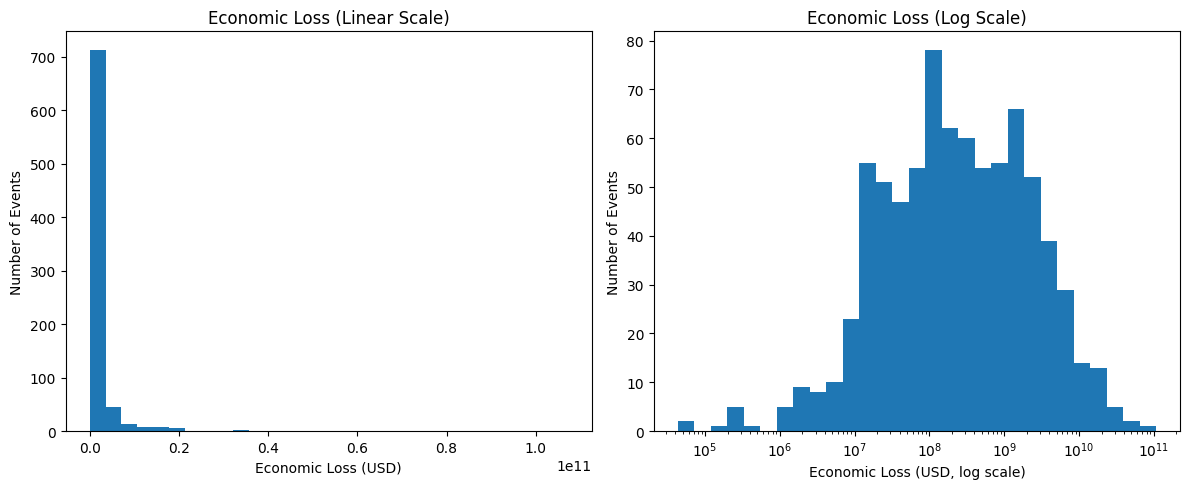

In [27]:
data = df["Total Damage, Adjusted ('000 US$)"].dropna() * 1000  # USD
data = data[data > 0]

plt.figure(figsize=(12, 5))

# Linear scale
plt.subplot(1, 2, 1)
plt.hist(data, bins=30)
plt.title("Economic Loss (Linear Scale)")
plt.xlabel("Economic Loss (USD)")
plt.ylabel("Number of Events")

# Log scale (same data, different axis)
plt.subplot(1, 2, 2)
plt.hist(data, bins=np.logspace(np.log10(data.min()), np.log10(data.max()), 30))
plt.xscale("log")
plt.title("Economic Loss (Log Scale)")
plt.xlabel("Economic Loss (USD, log scale)")
plt.ylabel("Number of Events")

plt.tight_layout()
plt.show()

In [28]:
# =========================
# Outlier Analysis (Percentile-Based)
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# İncelenecek sayısal kolonlar
outlier_cols = {
    "Total Deaths": df["Total Deaths"],
    "No. Injured": df["No. Injured"],
    "Total Affected": df["Total Affected"],
    "Economic Loss (USD)": df["Total Damage, Adjusted ('000 US$)"] * 1000
}

summary = []

for name, s_raw in outlier_cols.items():
    s = pd.to_numeric(s_raw, errors="coerce").dropna()
    s = s[s > 0]

    if len(s) == 0:
        continue

    p95 = np.percentile(s, 95)
    p99 = np.percentile(s, 99)
    max_val = s.max()

    n = len(s)
    n_p95 = (s > p95).sum()
    n_p99 = (s > p99).sum()

    summary.append({
        "Variable": name,
        "Count": n,
        "P95": p95,
        "P99": p99,
        "Max": max_val,
        "Events > P95 (%)": 100 * n_p95 / n,
        "Events > P99 (%)": 100 * n_p99 / n
    })

# Özet tablo
outlier_summary = pd.DataFrame(summary)
outlier_summary


,Variable,Count,P95,P99,Max,Events > P95 (%),Events > P99 (%)
0,Total Deaths,3118,2.481500e+02,2.454320e+03,5.300000e+04,5.003207,1.026299
1,No. Injured,1489,2.982600e+03,5.746104e+04,4.615420e+05,5.036938,1.007388
2,Total Affected,2994,1.028388e+06,7.107000e+06,3.301286e+07,5.010020,1.002004
3,Economic Loss (USD),802,7.604116e+09,2.355399e+10,1.071873e+11,5.112219,1.122195


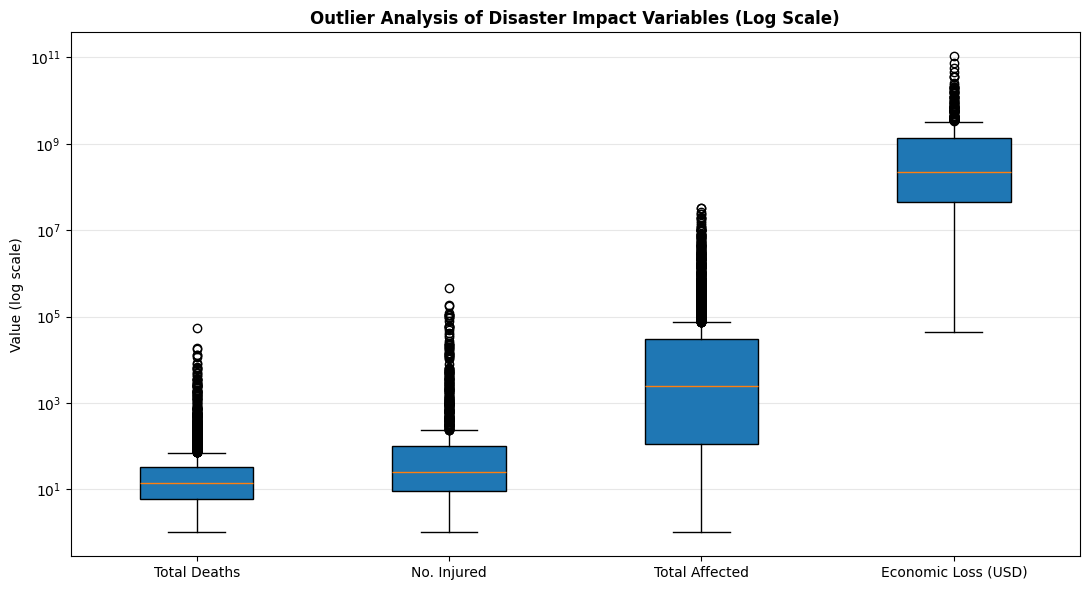

In [29]:
# =========================
# Outlier Analysis using Boxplots (Log Scale)
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Kullanılacak kolonlar (event-level impact)
boxplot_data = {
    "Total Deaths": df["Total Deaths"],
    "No. Injured": df["No. Injured"],
    "Total Affected": df["Total Affected"],
    "Economic Loss (USD)": df["Total Damage, Adjusted ('000 US$)"] * 1000
}

# Temizleme: numeric + pozitif
clean_data = []
labels = []

for label, s_raw in boxplot_data.items():
    s = pd.to_numeric(s_raw, errors="coerce").dropna()
    s = s[s > 0]   # log-scale için zorunlu
    clean_data.append(s)
    labels.append(label)

# Plot
plt.figure(figsize=(11, 6))

plt.boxplot(
    clean_data,
    tick_labels=labels,
    showfliers=True,
    patch_artist=True
)

# Log scale
plt.yscale("log")

# Estetik iyileştirme
plt.title("Outlier Analysis of Disaster Impact Variables (Log Scale)", fontweight="bold")
plt.ylabel("Value (log scale)")
plt.grid(True, axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


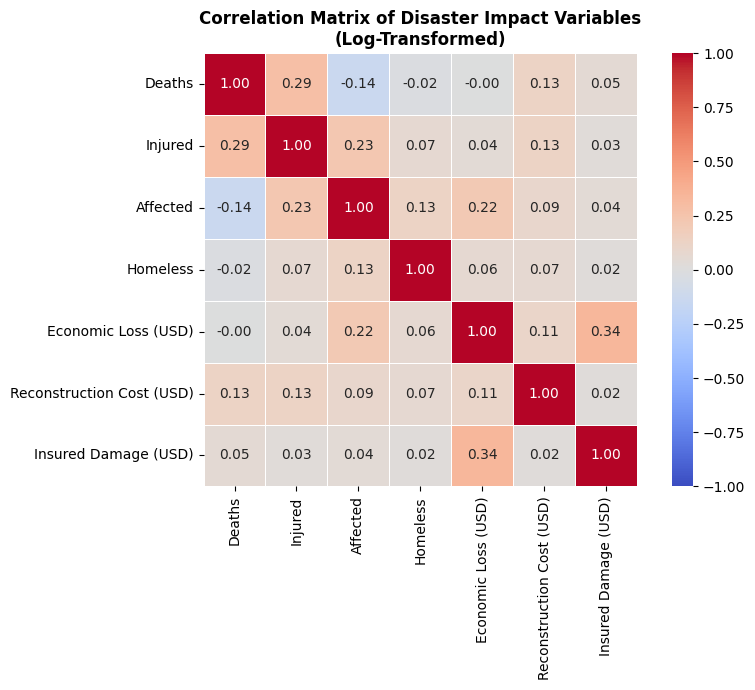

In [30]:
# =========================
# Extended Correlation Matrix (Log-Transformed Impact Variables)
# =========================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_cols = {
    "Deaths": df["Total Deaths"],
    "Injured": df["No. Injured"],
    "Affected": df["Total Affected"],
    "Homeless": df["No. Homeless"],
    "Economic Loss (USD)": df["Total Damage, Adjusted ('000 US$)"] * 1000,
    "Reconstruction Cost (USD)": df["Reconstruction Costs, Adjusted ('000 US$)"] * 1000,
    "Insured Damage (USD)": df["Insured Damage, Adjusted ('000 US$)"] * 1000
}

corr_df = pd.DataFrame()

for name, s_raw in corr_cols.items():
    s = pd.to_numeric(s_raw, errors="coerce").fillna(0)
    corr_df[name] = np.log1p(s)

# Correlation matrix
corr_matrix = corr_df.corr(method="pearson")

# Plot
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    center= 0
)

plt.title(
    "Correlation Matrix of Disaster Impact Variables\n(Log-Transformed)",
    fontweight="bold"
)
plt.tight_layout()
plt.show()


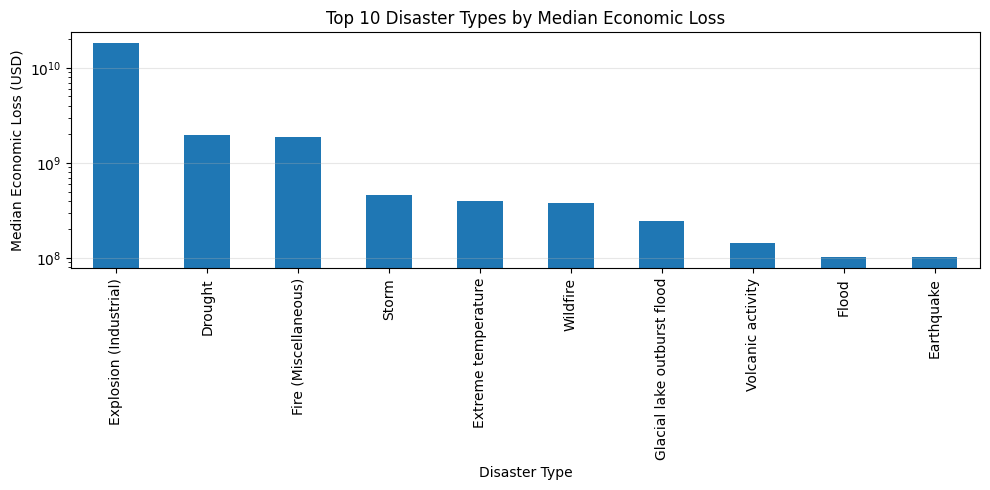

In [31]:
# =========================
# Median Economic Loss by Disaster Type
# =========================

impact_by_type = (
    df.assign(econ_loss_usd=df["Total Damage, Adjusted ('000 US$)"] * 1000)
      .groupby("Disaster Type")["econ_loss_usd"]
      .median()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 5))
impact_by_type.plot(kind="bar")
plt.ylabel("Median Economic Loss (USD)")
plt.title("Top 10 Disaster Types by Median Economic Loss")
plt.yscale("log")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()
